# Extracting Data From Xfoil

Xfoil can be used to produce estimates for the lift and drag coefficients on a 2D aerofoil section. The 2D section can be input as a set of co-ordinates which define the shape. Xfoil then uses a vortex panel method to calculate the circulation (and hence lift) and form drag, and boundary layer theory to estimate the skin drag

## Commumication via files
Xfoil can be used to produce estimates for the lift and drag coefficients on a 2D aerofoil section. The 2D section can be input as a set of co-ordinates which define the shape. Xfoil then uses a vortex panel method to calculate the circulation (and hence lift) and form drag, and boundary layer theory to estimate the skin drag. 

Below is a robust way of interacting with xfoil programatically, to automate the process of using xfoil. This is written in python, but a similar approach can also be used using matlab.

1. Write a file to disk which contains xfoil commands.
2. Use a system call to run xfoil, and redirect the file into xfoil.
3. Redirect the output from the screen (stdout) to a file.
4. Read the file, and extract the required data. 

In linux commands that would other wise be typed into a program by the user can be redirected in from a pre-written file. 

The command 

    user$ xfoil < inputfile.txt
 
runs xfoil and reads the commands from the file "inputfile.txt".The command 

    user$ xfoil < inputfile.txt > outputfile.txt
    
also outputs to "outputfile.txt"

This method also works on windows. 

You can also download an add-in to matlab which runs xfoil, but it works in the same way. 




In [25]:
#%%
from io import *
import os
import re

#open the file for the xfoil commands
out=open('xfoilinput.txt', 'w')

# Write xfoil commands to the file (as they would 
# be typed into xfoil)
out.write(
"""load testfoil.dat
panel
OPER
V 1e-5
Re 1e5
A 5
!

quit
"""
)

#Close the file to make sure the file is written 
#to disk properly
out.close() 

#call the system command to run xfoil and redirect 
#our input file into it
os.system('xfoil < xfoilinput.txt > xfoiloutput.txt')

#Using the python popen command, the output from this can 
#be redirected from the standard output using the read() 
#method.

        
text= open("xfoiloutput.txt").readlines()[-10:]
print(text)
#use regular expressions to read the 
#text and find the Cl and Cd
matches=re.search('CL =  ([0-9/.]*)',text[3])
cl = matches.groups()[0]
print("lift coefficienct = ",cl)
matches=re.search('CD =  ([0-9/.]*)',text[4])
cd = matches.groups()[0]
print("drag coefficient = ", cd)

[' Side 2 forced transition at x/c =  1.0000   75\n', '\n', '  10   rms: 0.2750E-03   max: -.2409E-02   C at   75  2\n', '       a =  5.000      CL =  0.7049\n', '      Cm = -0.0354     CD =  0.01687   =>   CDf =  0.00637    CDp =  0.01050\n', ' VISCAL:  Convergence failed\n', ' Type "!" to continue iterating\n', '\n', '.OPERv   c>  \n', ' XFOIL   c>  ']
lift coefficienct =  0.7049
drag coefficient =  0.01687


## Using the python xfoil module

If you can get it to install, the following module in python is a clone of xfoil.

https://pypi.org/project/xfoil/




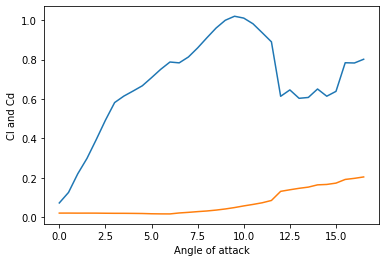

In [26]:
import xfoil as xf
import xfoil.model as m
from matplotlib.pylab import *


from numpy import *

#load teh x y data for the foil

co = loadtxt('foil.dat',float) # CHANGE FILE NAME AND UNCOMMENT TO USE YOUR FILE

#create an xfoil class
x=xf.XFoil()

#create new aerofoil object to pass to the class
af=m.Airfoil(co[:,0],co[:,1])       #UNCOMMENT TO USE YOUR FILE
x.airfoil=af       #UNCOMMENT TO USE YOUR FILE
#or an use a naca aerofoil
#x.naca('0012')              #COMMENT TO USE YOU FILE
x.repanel(100)
x.Re = 1e5
x.max_iter = 500
#cl,cd,cm,ct= x.a(90)       #use this command for single angle of attack
a,cl,cd,cm,ct= x.aseq(0,17,.5)
plot(a,cl)
plot(a,cd)
xlabel('Angle of attack')
ylabel('Cl and Cd')
show()

## Using sub-processes (Python+linux only)

Using a file to communicate between two computer programs is inefficient. Using python (difficult in matlab) subprocesses can be used. Below, the module pexpect is used to spawn a new Xfoil process, and send commands to it, before reading back its response. The loop will keep Xfoil iterating until it converges. 

In [4]:
import pexpect, pexpect.popen_spawn
import re
promptlist = b'c>   '
child=pexpect.popen_spawn.PopenSpawn("cmd",10)
child.sendline(b"C:\Users\sas37\OneDrive - University Of Cambridge\Teaching\ET-B2 wind etc")
child.sendline(b"xfoil.exe")
child.expect(promptlist)
child.sendline('load testfoil.dat')
#child.expect(promptlist)
child.sendline('OPER')
#child.expect(promptlist)
child.sendline('V 1e-5')
#child.expect(promptlist)
child.sendline('Re 1e5')
#child.expect(promptlist)
child.sendline('A 5')
#child.expect(promptlist,timeout=2)
stuff = child.before.splitlines()
while stuff[-2]== b' Type "!" to continue iterating':
    child.sendline('!')
    child.expect(promptlist)
    stuff = child.before.splitlines()
    #use regular expressions to read the text and find the Cl and Cd
    matches=re.search('CL = ([0-9/.]*)',stuff[-4].decode())
    cl = matches.groups()[0]
    print("lift coefficient = ",cl)
    matches=re.search('CD = ([0-9/.]*)',stuff[-3].decode())
    cd = matches.groups()[0]
    print("drag coefficient = ", cd)



ModuleNotFoundError: No module named 'pexpect'